In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
population = pd.read_csv("dbPopEstimatesByCMA2009-2019.csv")
population.tail(2)

,REF_DATE,GEO,DGUID,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
64,2018,"Vancouver (CMA), British Columbia",2016S0503933,Both sexes,All ages,Persons,249,units,0,v1060818031,142.1.1,2652306,NaN,NaN,NaN,0
65,2019,"Vancouver (CMA), British Columbia",2016S0503933,Both sexes,All ages,Persons,249,units,0,v1060818031,142.1.1,2691351,NaN,NaN,NaN,0


In [3]:
population =population.drop(['SYMBOL', 'Sex', 'Age group' ,'TERMINATED', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 
                              'COORDINATE', 'STATUS', 'DECIMALS'], axis=1)
population.shape

(66, 3)

In [4]:
population.columns.tolist()

['REF_DATE', 'GEO', 'VALUE']

In [5]:
population.GEO.value_counts()

Montréal (CMA), Quebec                     11
Toronto (CMA), Ontario                     11
Ottawa - Gatineau (CMA), Ontario/Quebec    11
Calgary (CMA), Alberta                     11
Edmonton (CMA), Alberta                    11
Vancouver (CMA), British Columbia          11
Name: GEO, dtype: int64

In [9]:
pop_montreal = population.loc[population['GEO']=='Montréal (CMA), Quebec']
pop_toronto = population.loc[population['GEO']=='Toronto (CMA), Ontario']
pop_vancouver = population.loc[population['GEO']=='Vancouver (CMA), British Columbia']
pop_calgary = population.loc[population['GEO']=='Calgary (CMA), Alberta']

In [13]:
city4_population = pd.concat([pop_montreal,pop_toronto, pop_vancouver, pop_calgary], axis =0)

In [14]:
city4_population.head(20)

,REF_DATE,GEO,VALUE
0,2009,"Montréal (CMA), Quebec",3907597
1,2010,"Montréal (CMA), Quebec",3953773
2,2011,"Montréal (CMA), Quebec",3994492
3,2012,"Montréal (CMA), Quebec",4031655
4,2013,"Montréal (CMA), Quebec",4066332
5,2014,"Montréal (CMA), Quebec",4093501
6,2015,"Montréal (CMA), Quebec",4109712
7,2016,"Montréal (CMA), Quebec",4140425
8,2017,"Montréal (CMA), Quebec",4190786
9,2018,"Montréal (CMA), Quebec",4253300


In [24]:
city4_grouped = city4_population.groupby(['REF_DATE', 'GEO'])
plot_city4 = city4_grouped.agg({'VALUE': 'mean'})
plot_city4

VALUE
REF_DATE GEO                                       
2009     Calgary (CMA), Alberta             1220700
         Montréal (CMA), Quebec             3907597
         Toronto (CMA), Ontario             5588312
         Vancouver (CMA), British Columbia  2301469
2010     Calgary (CMA), Alberta             1240521
         Montréal (CMA), Quebec             3953773
         Toronto (CMA), Ontario             5681126
         Vancouver (CMA), British Columbia  2344847
2011     Calgary (CMA), Alberta             1263935
         Montréal (CMA), Quebec             3994492
         Toronto (CMA), Ontario             5768001
         Vancouver (CMA), British Columbia  2374642
2012     Calgary (CMA), Alberta             1300292
         Montréal (CMA), Quebec             4031655
         Toronto (CMA), Ontario             5852841
         Vancouver (CMA), British Columbia  2418938
2013     Calgary (CMA), Alberta             1344686
         Montréal (CMA), Quebec             4066332
         Toronto (CMA), Ontario             5931697
         Vancouver (CMA), British Columbia  2459426
2014     Calgary (CMA), Alberta             1386828
         Montréal (CMA), Quebec             4093501
         Toronto (CMA), Ontario             5998737
         Vancouver (CMA), British Columbia  2507414
2015     Calgary (CMA), Alberta             1414010
         Montréal (CMA), Quebec             4109712
         Toronto (CMA), Ontario             6045240
         Vancouver (CMA), British Columbia  2544484
2016     Calgary (CMA), Alberta             1438160
         Montréal (CMA), Quebec             4140425
         Toronto (CMA), Ontario             6125013
         Vancouver (CMA), British Columbia  2582202
2017     Calgary (CMA), Alberta             1459256
         Montréal (CMA), Quebec             4190786
         Toronto (CMA), Ontario             6219114
         Vancouver (CMA), British Columbia  2612874
2018     Calgary (CMA), Alberta             1483983
         Montréal (CMA), Quebec             4253300
         Toronto (CMA), Ontario             6344275
         Vancouver (CMA), British Columbia  2652306
2019     Calgary (CMA), Alberta             1514723
         Montréal (CMA), Quebec             4318505
         Toronto (CMA), Ontario             6471850
         Vancouver (CMA), British Columbia  2691351

Text(0, 0.5, 'Average Population')

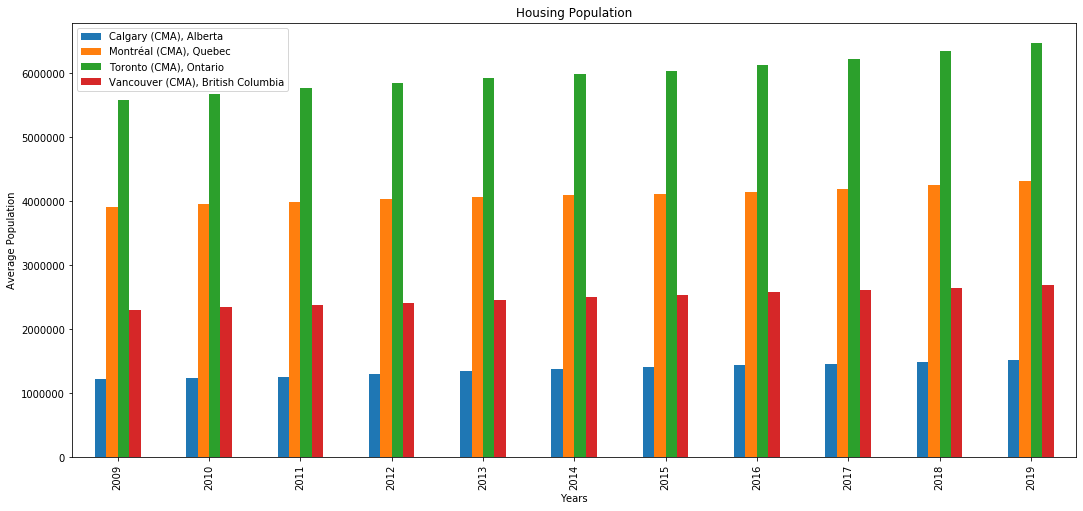

In [47]:
ax1 = plot_city4.groupby(['REF_DATE', 'GEO']).VALUE.mean().unstack().plot.bar(figsize = (18, 8), title="Housing Population")
ax1.legend(loc = 'best')
ax1.set_xlabel("Years")
ax1.set_ylabel("Average Population")

In [ ]:
''' figure repersent that Toronto and Montreal are more pouplated as compare to Calgary and Vancouver in housing Market'''